In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
matches_dataset = pd.read_csv('Ipl Data/matches.csv')

In [4]:
#Analysis of teams that have played and won the maximum finals 
finals=matches_dataset.drop_duplicates(subset=['season'],keep='last')
finals=finals[['id','season','city','team1','team2','toss_winner','toss_decision','winner']]
most_finals=pd.concat([finals['team1'],finals['team2']]).value_counts().reset_index()
most_finals.rename({'index':'team',0:'count'},axis=1,inplace=True)
xyz=finals['winner'].value_counts().reset_index()
most_finals=most_finals.merge(xyz,left_on='team',right_on='index',how='outer')
most_finals=most_finals.replace(np.NaN,0)
most_finals.drop('index',axis=1,inplace=True)
most_finals.set_index('team',inplace=True)
most_finals.rename({'count':'finals_played','winner':'won_count'},inplace=True,axis=1)

most_finals

,finals_played,won_count
team,,
Chennai Super Kings,8,3.0
Mumbai Indians,5,4.0
Royal Challengers Bangalore,3,0.0
Sunrisers Hyderabad,2,1.0
Kolkata Knight Riders,2,2.0
Kings XI Punjab,1,0.0
Deccan Chargers,1,1.0
Rajasthan Royals,1,1.0
Rising Pune Supergiant,1,0.0


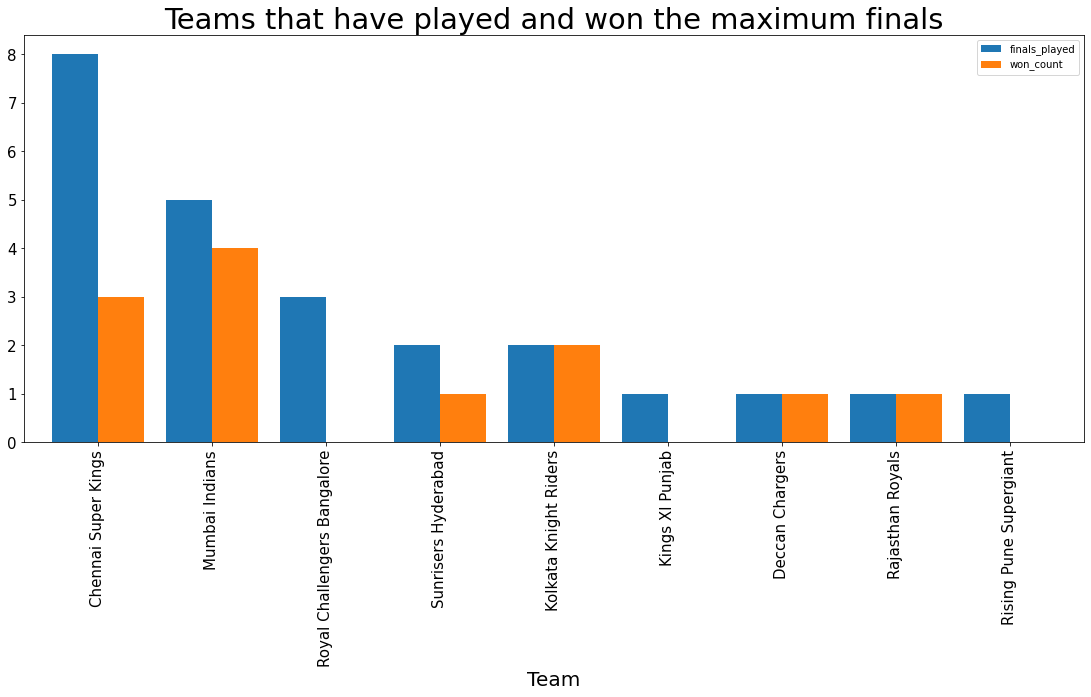

In [5]:
most_finals.plot.bar(width=0.8)
plt.gcf().set_size_inches(19,7.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Team",fontsize=20)
plt.title("Teams that have played and won the maximum finals",fontsize=29)

plt.show()
